In [200]:
import pandas as pd
from keras import Sequential
from keras.layers import Dense, Conv2D, Flatten, Dropout
from keras.utils import np_utils
import matplotlib.pyplot as plt
from keras.layers.convolutional import MaxPooling2D
from sklearn.model_selection import train_test_split
import numpy as np

In [201]:
dataset = pd.read_csv('all/train.csv')

In [202]:
dataset.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [203]:
y = dataset.loc[:,['label']]
y = y.values

In [204]:
images = dataset.drop(['label'], axis =1)


In [205]:
# the dataset 
print('Length of the dataset: ', len(images))

Length of the dataset:  42000


In [213]:
tr_data_images = images[:38800]
tr_data_labels = y[:38800]

test_data_images = images[38800:]
test_label_images = y[38800:]

assert tr_data_images.shape == (38800, 784) 
assert tr_data_labels.shape == (38800,1)

In [214]:
y_train = np_utils.to_categorical(tr_data_labels)
y_test = np_utils.to_categorical(test_label_images)
num_classes = y_train.shape[1]

In [215]:
print(tr_data_images.shape)
print(type(tr_data_images))
images_array = tr_data_images.values

print(images_array[0])

(38800, 784)
<class 'pandas.core.frame.DataFrame'>
[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0 188 255  94   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 191 250 253
  93   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0 123 248 253 167  10   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  80 247 253
 208  13   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0


In [216]:
images_resized = []
for one_image in images_array:
    image_resized = np.reshape(one_image, (28,28,1))
    images_resized.append(image_resized)
    
x_train = np.array(images_resized)    


In [217]:
print(x_train.shape,'\n', y_train.shape)
print('one single image dimensions: ', x_train[0].shape)
print('one single label dimension: ', y_train[0].shape)

(38800, 28, 28, 1) 
 (38800, 10)
one single image dimensions:  (28, 28, 1)
one single label dimension:  (10,)


In [218]:
test_images_array = test_data_images.values

test_images_resized = []

for an_image in test_images_array:
    an_image_resized = np.reshape(an_image, (28, 28, 1))
    test_images_resized.append(an_image_resized)
    
x_test = np.array(test_images_resized)


### Data Augmentation

In [190]:
x_train_augmented, y_train_aug = [], []

for image, label in zip(x_train, y_train):
    x_train_augmented.append(image)
    y_train_aug.append(label)
    x_train_augmented.append(np.fliplr(image))
    y_train_aug.append(label)
    
x_train = np.array(x_train_augmented)
y_train = np.array(y_train_aug)

In [219]:
print(len(x_train), len(y_train))

38800 38800


In [220]:
x_train = x_train/255
x_test = x_test/255



In [221]:
print(x_test.shape)
#plt.imshow(x_test[0], cmap = 'gray')

(3200, 28, 28, 1)


In [222]:
cf = Sequential()
cf.add(Conv2D(32, kernel_size = (5,5), activation = 'relu', input_shape = (28,28,1)))
cf.add(MaxPooling2D(pool_size=(2, 2)))
cf.add(Conv2D(32, kernel_size = (5,5), activation = 'relu'))
cf.add(Dropout(0.4))
cf.add(Conv2D(32, kernel_size = (5,5), activation = 'relu'))
cf.add(MaxPooling2D(pool_size=(2, 2)))
cf.add(Dropout(0.4))
cf.add(Flatten())
cf.add(Dense(200, activation = 'relu'))
cf.add(Dense(num_classes, activation='softmax'))

In [223]:
cf.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [224]:
cf.fit(x_train,y_train, validation_data=(x_test, y_test), epochs=8)

Train on 38800 samples, validate on 3200 samples
Epoch 1/8
38800/38800 [==============================] - 21s 530us/step - loss: 0.3198 - acc: 0.8978 - val_loss: 0.0709 - val_acc: 0.9766
Epoch 2/8
38800/38800 [==============================] - 20s 512us/step - loss: 0.1069 - acc: 0.9671 - val_loss: 0.0364 - val_acc: 0.9869
Epoch 3/8
38800/38800 [==============================] - 20s 522us/step - loss: 0.0810 - acc: 0.9755 - val_loss: 0.0378 - val_acc: 0.9884
Epoch 4/8
38800/38800 [==============================] - 21s 534us/step - loss: 0.0683 - acc: 0.9792 - val_loss: 0.0284 - val_acc: 0.9912
Epoch 5/8
38800/38800 [==============================] - 21s 536us/step - loss: 0.0627 - acc: 0.9804 - val_loss: 0.0292 - val_acc: 0.9903
Epoch 6/8
38800/38800 [==============================] - 21s 540us/step - loss: 0.0570 - acc: 0.9828 - val_loss: 0.0325 - val_acc: 0.9916
Epoch 7/8
38800/38800 [==============================] - 21s 535us/step - loss: 0.0529 - acc: 0.9842 - val_loss: 0.0240 - v

In [225]:
digit = cf.predict(x_test)

[4.4237465e-12 8.7852789e-12 4.5381302e-08 6.3691300e-07 7.0093167e-11
 1.2740027e-08 1.8807342e-10 3.3677030e-11 9.9999928e-01 9.1621493e-09]


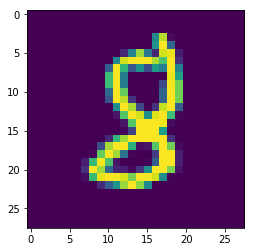

In [226]:
print(digit[1])
sample = x_test[1].reshape(28,28)
plt.imshow(sample)

#### Using the test data, unseen so far by the model

In [227]:
test = pd.read_csv('all/test.csv')
test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### Function to prepare the data 

In [228]:
test.shape

(28000, 784)

In [229]:
def data_preparation(data):
    test_array = []
    test_data = data.values
    for image in test_data:
        image_resized = np.reshape(image, (28,28,1))
        test_array.append(image_resized)
        
    test_images = np.asarray(test_array)
    
    assert len(test_images)== len(test_data)
    
    test_images = test_images/255
    
    return test_images
        
    
test_images = data_preparation(test)

In [230]:
digit_predictions = cf.predict(test_images)

In [231]:
print(type(digit_predictions[0]))

<class 'numpy.ndarray'>


In [232]:
labels = []
for image_id, digit in enumerate(digit_predictions, 1):
    label = np.argmax(digit)
    labels.append((image_id,label))
    
print(len(labels))
    

28000


In [233]:
results = pd.DataFrame(labels, columns = ['ImageId', 'Label'])

In [234]:
results.to_csv('digits.csv', index = False)

In [235]:
results

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3
5,6,9
6,7,0
7,8,3
8,9,0
9,10,3
